# Intro to python and plotting!
In this notebook you'll find:

0. How to use Jupyter lab
1. The most basic graph
2. Some basic modifications
3. Loading data to plot
4. Making functions for plotting

# 0. Using Jupyter Lab

- Jupyter lab is ideal for developing and testing code
- It gives you a useful file explorer on the left
- You can then open notebooks and python files in the main window
- Notebooks (.ipynb files) are useful because:
    - The code is split into cells which can be run individually
    - You can add 'Markdown' in the form of text, images, links etc. which improve documentation
- Some handy shortcuts:
    - Run cell and progress: 
        - Shift + Enter
    - Run cell and remain: 
        - Shift + Ctrl
    - Suggest auto-completion: 
        - Tab
    - See function help info: 
        - Shift + Tab + Tab (with cursor inside function brackets)
    - Comment/uncomment multiple lines of text: 
        - Ctrl + / (with lines highlighted)
    - When you run a cell, it will automatically print the contents of the last line
    
- More details here https://www.dataquest.io/blog/jupyter-notebook-tutorial/

# 1. Basic plot
See lots of info here https://matplotlib.org/stable/tutorials/introductory/pyplot.html
### Import modules and choose plot style

In [1]:
# This will import all of the plotting code from matplotlib
from matplotlib import pyplot as plt

# We will use numpy in this example to generate our data
import numpy as np

# Default plots will appear 'inline' (embedded in this window), 
# run '%matplotlib qt' to make plots appear in a new window,
# run '%matplotlib inline' to switch back

#%matplotlib qt
%matplotlib inline

### Simplest plot
- Use the basic matplotlib plotting function to plot x vs y

__Generate data__

In [2]:
# Generate x values 
xs = np.arange(0, 10, 0.1)

# Generate y values
ys = np.sin(xs)

__Plot data__

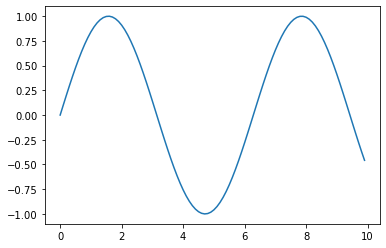

In [3]:
plt.plot(xs,ys)

# 2. Improved plot

### Basic modifications
We will now: 
- change the colour of the plot
- plot a data series with errorbars on the same graph
- add axis labels
- add a title 
- change the range of the plot
- add a legend

In the end we will hopefully end up with something like this <br>
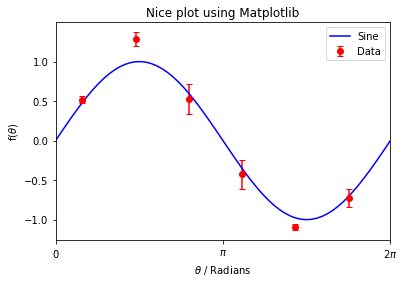

__Generate Data__

In [11]:
# Generate x values from 0 to 10 in steps of 0.1
xs = np.arange(0, 10, 0.1)

# Generate y values
ys = np.sin(xs)

# We will now make up a dataset by adding random values to sin(x)
xdat = np.arange(.5, 9.5, 1)
ydat = []
for x in xdat:
    y = np.sin(x) + 0.7 * (np.random.rand() - 0.5)
    ydat.append(y)
    
# Make up some error values
yerrs = []
for y in ydat:
    yerr = y*0.01 + 0.5 * (np.random.rand() - 0.5)
    yerrs.append(yerr)

__Plot data__

Several paramaters can be changed by adding 'kwargs' to py.plot() <br>
kwarg means 'keyword arguement' and they are optional extra inputs for a function <br>
Remember you can click inside a function and press 'Shift + Tab' to get help

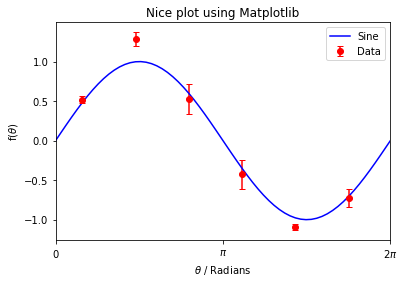

In [13]:
# Use a kwarg to change the colour of the plot
plt.plot(xs,ys, color='blue')

# Plot the dataset and errors
plt.errorbar(xdat,ydat, yerrs, fmt='ro',capsize=3)

# Label x as theta in radians, and y as f(theta)
    #  text surrounded with $ is interpreted as Latex maths notation
    #  putting 'r' before the string stops python executing backslash commands (eg \t = tab)
plt.xlabel(r'$\theta$ / Radians')
plt.ylabel(r'f($\theta$)')

# Add a title
plt.title('Nice plot using Matplotlib')

# change range of the x axis to only show 0 to 2 pi
plt.xlim((0,2*np.pi))

# Edit the x axis ticks to show multiples of pi
plt.xticks(ticks=[0,np.pi,2*np.pi],labels=['$0$',r'$\pi$',r'$2\pi$'])

# add a legend
plt.legend(['Sine','Data'])

#### Plotting series of data
What if we had a time-series of data where it only changes slightly each time?
How could we plot it?

In [160]:
# Generate x values from 0 to 10 in steps of 0.1
xs = np.arange(0, 10, 0.1)

# Generate initial y values
ys = np.sin(xs)


# Generate a fake 'time series'
all_ys = []

for i in range(20):
    yi = ys+(i+1)*.25
    all_ys.append(yi)

Text(4.9, 5, '$t = 20 \\rightarrow$')

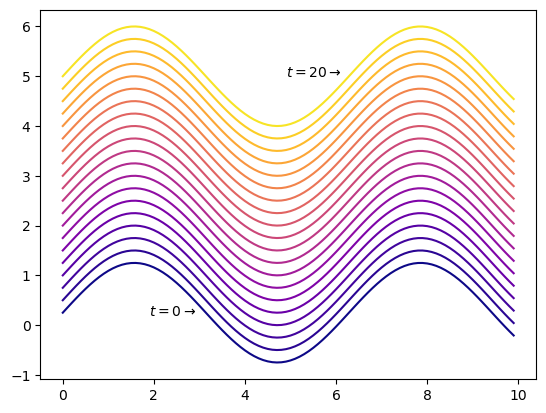

In [182]:
# let's choose a nice colormap
cmap= plt.get_cmap('plasma')

# And now we can plot all 20 datasets with a different color
for i in range(20):
    plt.plot(xs,all_ys[i],color=cmap(i/20))
    
# Let's add a text label to the plot
plt.text(1.9,0.2,r'$t = 0 \rightarrow$')
plt.text(4.9,5,r'$t = 20 \rightarrow$')

#### Making multiple plots

In [202]:
# Generate x values from 0 to 10 in steps of 0.1
xs = np.arange(0, 10, 0.1)

# Generate initial y values
y1 = np.random.rand()*np.sin(np.random.rand()*xs) + np.random.rand()*np.cos(np.random.rand()*xs)
y2 = np.random.rand()*np.sin(np.random.rand()*xs) + np.random.rand()*np.cos(np.random.rand()*xs)
y3 = np.random.rand()*np.sin(np.random.rand()*xs) + np.random.rand()*np.cos(np.random.rand()*xs)

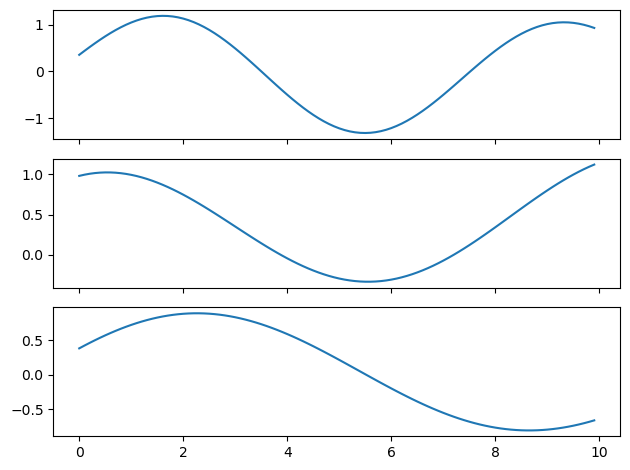

In [204]:
# Let's create a set of 'subplots'
# We can tell it in advance we want each plot to have the same x values
fig, axes = plt.subplots(nrows=3,sharex=True)

axes[0].plot(xs,y1)
axes[1].plot(xs,y2)
axes[2].plot(xs,y3)

# Squeeze plots closer together
plt.tight_layout()

# 3. Plotting data from a file

Now let's try to reproduce a graph from this awesome website!
You can download all their data as .csv files
We'll aim to reproduce the 'Projection of world population by education level'

https://ourworldindata.org/a-history-of-global-living-conditions-in-5-charts


![Graph](https://ourworldindata.org/grapher/exports/projection-of-world-population-SSP2-IIASA.svg)

In [14]:
# We'll be using pandas to handle loading the data
import pandas as pd

# pyplot for plotting
import matplotlib.pyplot as plt

# We will additionally fully import matplotlib to be able to adjust more plot settings
import matplotlib

# numpy for maths
import numpy as np

### Load in data
Pandas can read data from many sources, and converts it into tables it calls 'dataframes'

In [15]:
# Open saved file and view
# The file is called: projection-of-world-population-SSP2-IIASA.csv
df = pd.read_csv('projection-of-world-population-SSP2-IIASA.csv')

In [16]:
# Check how it loaded
df

,Entity,Code,Year,Post Secondary (IIASA (2016)),Upper Secondary (IIASA (2016)),Lower Secondary (IIASA (2016)),Primary (IIASA (2016)),Incomplete Primary (IIASA (2016)),No Education (IIASA (2016)),Under 15 (IIASA (2016))
0,World,OWID_WRL,1970,101463580,307645270,294393410,533866870,213280670,852015980,1378077120
1,World,OWID_WRL,1975,135628950,390703720,364304800,586138040,228487940,862538720,1491606470
2,World,OWID_WRL,1980,176871540,483938060,448134810,640271120,245332730,873344840,1566251150
3,World,OWID_WRL,1985,224795020,577295870,548682060,687326790,255128620,864490330,1638973460
4,World,OWID_WRL,1990,283065550,691635730,666263600,758138630,275026930,879361350,1731434510
5,World,OWID_WRL,1995,349531600,809166470,777572130,797401340,286206620,869366360,1814459130
6,World,OWID_WRL,2000,422580680,946740810,893735000,842728860,299523480,850174500,1844169670
7,World,OWID_WRL,2005,510662140,1106682320,1027531630,875914110,308032070,822837920,1830582280
8,World,OWID_WRL,2010,615180850,1269257460,1134045170,901162550,317158190,791487880,1842570290
9,World,OWID_WRL,2015,725515860,1431279740,1213698370,932093060,316235420,767773610,1861324360


### Extract data from loaded file

In [17]:
# Access a column of data

# Method 1: Use column name
df['Year']

# Method 2: Use column index
#df.iloc[:,2]

0     1970
1     1975
2     1980
3     1985
4     1990
5     1995
6     2000
7     2005
8     2010
9     2015
10    2020
11    2025
12    2030
13    2035
14    2040
15    2045
16    2050
17    2055
18    2060
19    2065
20    2070
21    2075
22    2080
23    2085
24    2090
25    2095
26    2100
Name: Year, dtype: int64

In [18]:
# The year is our X data, so let's take it out
x = df['Year']

# Now lets get all the y data

    # Access all column headings and data
headings = df.keys()

    # We don't care about the first 3 headings any more
    # Use 'slicing' to remove the first 3 items
headings = headings[3:]

    # Get all data using a loop
all_ys = []
for h in headings:
    # Extract the data
    y = df[h]
    
    # Add it to our list
    all_ys.append(y)

### Basic plot

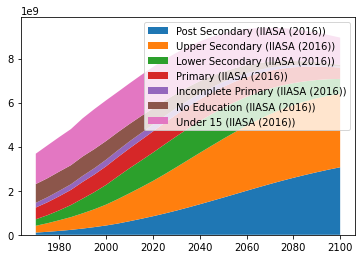

In [19]:
# See what an initial plot looks like

# Let's use a stackplot to match the example
plt.stackplot(x,all_ys)

# Add a legend
plt.legend(headings)

### Improved plot

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


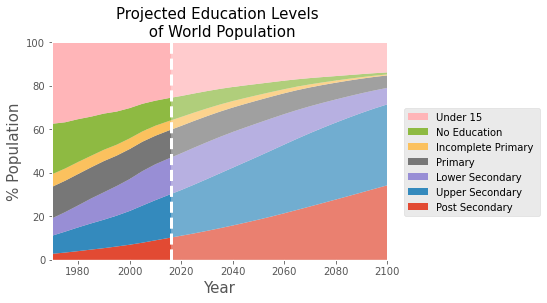

In [20]:
# Change default font and fontsize
font = {'sans-serif' :'Ariel',
        'size'   : 14}
matplotlib.rc('font', **font)

# Change default colours
# See example palettes here https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
# let's try 'ggplot'
plt.style.use('ggplot')

# Remove 'IIASA' bit from the label
nice_headings = []
for h in headings:
    new_h = h.replace("(IIASA (2016))", "")
    nice_headings.append(new_h)

# Make it a percentage of the total population for clarity
percent = np.array(all_ys) / np.sum(all_ys,axis=0) * 100
plt.stackplot(x, percent, labels=nice_headings)

# Add a dashed line from the point at which it becomes an estimation
plt.plot([2016,2016],[0,100],'w--',linewidth=3)

# Make it slightly transparent past the point at which it becomes an estimation
plt.fill_between([2016,2100],[0,0],[100,100],color='w',alpha=.3)

# Flip the legend entries upside down so they sit in order with position on graph
handles, labels = plt.gca().get_legend_handles_labels()
order = np.arange(len(nice_headings))[::-1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc=(1.05,0.2))

# Set axis limits more tightly
plt.xlim((x[0],np.array(x)[-1]))
plt.ylim((0,100))

# Add axis titles
plt.ylabel('% Population',fontsize=15)
plt.xlabel('Year',fontsize=15)

# Add title
plt.title('Projected Education Levels \n of World Population',fontsize=15)

# Show the plot
plt.show()

# Reset plotting style (This is just so other plots in the notebook come out normally)
plt.style.use('default')

# 4. Simulating polymer chains
This section will help understand the basics of functions

In this section we will:
- Import useful python libraries
- Define functions to:
    - Calculate root-mean-square end-to-end distance
    - Calculate a 2D Random walk
    - Plot a 2D random walk
- Look at the results
- Perform some statistical analysis on the results
- Set some extension work

You can access this section through google colab [here](https://colab.research.google.com/drive/1cy4ASfCKxiboK14noObAGfmDjQQKJSTE?usp=sharing)

## Import

In [91]:
import numpy as np  # This lets us do maths
from matplotlib import pyplot as plt  # This lets us plot things

## Function basics
- Functions are very useful in python
- Functions package up small bits of code that you might want to use again
- We have already been using lots of functions! e.g. np.mean(), plt.plot() etc...
- To create a function:
    - Define a function by writing 'def' 
    - Give it a name, (no spaces, must start with a letter)
    - Specifiy arguments (A user will need to specify these every time)
    - Specify any optional keyword arguments (These will default to your chosen value)
    - Give it help information by adding """ Info """ on the first line
    - Put your main block of code
    - Return any output you might want
- To call a function:
    - Type the name of the function and add brackets at the end, with any variables inside
    - e.g. my_function(x,y)

In [129]:
# Basic function example

def hello(name, caps=False):
    """ 
    Function which says hello!
    
    Inputs:
        name - String
        caps - Bool
    
    Outputs:
        text - String
    
    """
    
    # Main block of code
    text = 'Hello, my name is ' + name
    
    if caps == True:
        text = text.upper()
        text = text + '!!!'
    
    #Output a result
    return text

In [127]:
hello('George')

'Hello, my name is George'

In [130]:
hello('George',caps=True)

'HELLO, MY NAME IS GEORGE!!!'

## Some polymer basics
- In the most basic model, we can picture polymer as a 'freely jointed chain', in which we picture the polymer as non-flexible segments that join onto each other in random orientations
- ![polymer](https://www.researchgate.net/profile/Dirk-Hartmann-3/publication/33429050/figure/fig23/AS:669444619632654@1536619443720/Fig-C1-Illustration-of-a-freely-jointed-chain-an-oversimplified-polymer.png)
- A typical way to define the size is the 'root mean square end-to-end distance', $<r^2>^{1/2} = \sqrt{N}L $, where N is the number of segments, and L is the length of each segment
- The RMS distance is typically more accurate for large values of N, let's explore this here

In [98]:
def calculate_rms_dist(n,l=1):
    """ Returns the root mean square end-to-end distance given n steps of l length """
    rms = n**0.5 * l
    return rms

def random_walk(n,l=1):
    """ Takes n steps of length l in random 2D directions
    and returns the x and y postitions of each step """
    
    # creating two arrays for containing x and y coordinates
    # of size equals to the number of size and filled up with 0's
    x = np.zeros(n)
    y = np.zeros(n)
    
    # Loop over all steps
    for i in range(1, n):
        # Randomly choose the direction
        theta = np.random.random_sample() * 2*np.pi
        
        # Take the step
        x[i] = x[i-1] + l*np.cos(theta)
        y[i] = y[i-1] + l*np.sin(theta)
            
    return x, y

def plot_walk(x,y):
    """ A function to nicely plot 2D random walk results"""
    # Start figure
    plt.figure(figsize=(5,5))
    plt.style.use('default')
    
    # Plot walk
    plt.plot(x, y,'k.-',alpha=.5)
    
    # Plot start/end
    plt.plot(x[0],y[0],'go', label='Chain start')
    plt.plot(x[-1],y[-1],'ro', label='Chain end')
    
    # Calculate rms centre and radius
    n = len(x)
    rms = calculate_rms_dist(n)
    
    # Plot rms radius
    comx = np.mean(x)
    comy = np.mean(y)
    circle = plt.Circle((comx, comy), radius=rms/2, color='b', fill=False, ls='--',label='RMS distance')
    ax=plt.gca()
    ax.add_patch(circle)

    # Format plot
    plt.title("Random Walk ($n = " + str(n) + "$ steps)")
    plt.xlabel('x',fontsize=12)
    plt.ylabel('y',fontsize=12)
    
        # This just forces equal scales on x and y
    xmax = np.max([abs(np.min(x)),np.max(x),abs(comx)+rms/2,abs(comx)-rms/2])
    ymax = np.max([abs(np.min(y)),np.max(y),abs(comy)+rms/2,abs(comy)-rms/2])
    rmax = np.max([xmax,ymax])
    plt.xlim([-rmax,rmax])
    plt.ylim([-rmax,rmax])
    plt.gca().set_aspect("equal")
    
    plt.legend()

    plt.show()

## Look at results

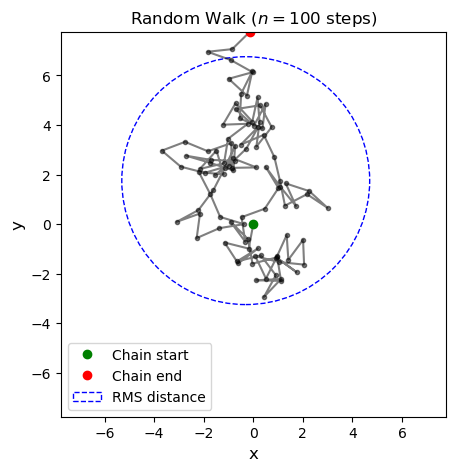

In [101]:
x,y = random_walk(100)
plot_walk(x,y)

## Small statistical analysis
- The rms end-to-end metric is valid for large values of n
- We can see this by calculating the rms metric and comparing it to the 'actual' end-to-end distance
- If we average over many results we can look at the statistics

In [23]:
# Initialise arrays
ns = [10,100,1000,10000]
mean_diffs = []
se_diffs = []

# Loop over the 4 values of n
for n in ns:
    diffs = []
    
    # Calculate each value 100 times
    for i in range(100):
        # Calculate 'real' e2e distance
        x,y = random_walk(n)
        
            # Note that using '-1' as the index goes to the last position
        real_e2e = ( (x[-1]-x[0])**2 + (y[-1]-y[0])**2 )**0.5 
        
        # Calculate rms e2e distance
        rms = calculate_rms_dist(n)
        
        # Calculate the absolute difference
        diff = abs(real_e2e-rms)
        diffs.append(diff)
        
    # For each value of n, calculate its mean difference and standard deviation
    mean_diff = np.mean(diffs)
    se_diff = np.std(diffs)
    
    mean_diffs.append(mean_diff)
    se_diffs.append(se_diff)

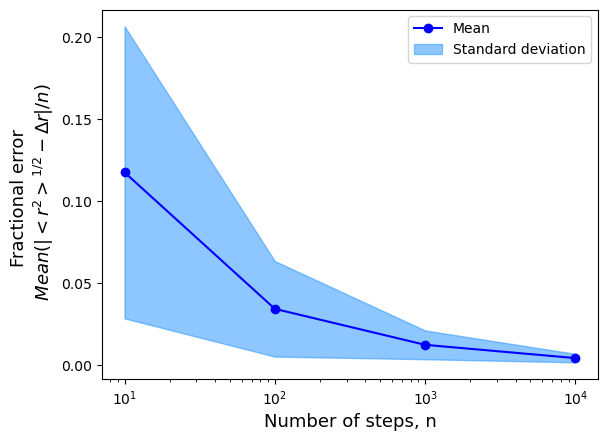

In [95]:
# Plot results
plt.plot(ns, np.array(mean_diffs)/np.array(ns), 'o-',color='blue')
plt.fill_between(ns,np.array(mean_diffs)/np.array(ns)-np.array(se_diffs)/np.array(ns),np.array(mean_diffs)/np.array(ns)+np.array(se_diffs)/np.array(ns),color='dodgerblue',alpha=.5)

# Format plot
plt.xscale('log')
plt.xlabel('Number of steps, n',fontsize=13)
plt.ylabel('Fractional error \n $Mean(|<r^2>^{1/2}-\Delta r|/n)$',fontsize=13)

plt.legend(['Mean','Standard deviation'])

In [144]:
# Let's see if we can fit a decay to the data

# We need to think what function might fit it
    # Let's try something like 1/sqrt(x) (with 'gradient' m, and intercept c)
def f(x,m,c):
    return m*x**-.5+c

# Next we will use scipy's 'optimize' to do the fitting
import scipy.optimize as optimize

# Define initial guess for m & c
p0 = (0.1, 0) 

# Run the fitting
params, cv = optimize.curve_fit(f, ns,np.array(mean_diffs)/np.array(ns), p0)
m, c = params

# Generate a fitted dataset from our parameters
xfit = np.logspace(1,4,100)
yfit = f(xfit,m,c)

In [147]:
# Why not also show the error for the fit!

def functional_error(f, xs, ps, perrs):
    """ Functional error calculation following Hughes & Hase method 
        https://pubs.acs.org/doi/10.1021/ed2004627
    """
    # Calculate value with no error
    y0 = f(xs, *ps)
    
    err_components = []
    
    # For each parameter, recalculate y using p + perr
    # Take the difference between this and y0
    for i, p in enumerate(ps):
        err_params = ps
        err_params[i] = p+perrs[i]
        err_comp = f(xs,*err_params) - y0
        err_components.append(err_comp)
        
    # The total error is the sum of the squares, square rooted
    yerr = np.hypot(*err_components)
    
    return yerr

perr = np.sqrt(np.diag(cv))
yerr = functional_error(f, xfit, params, perr)

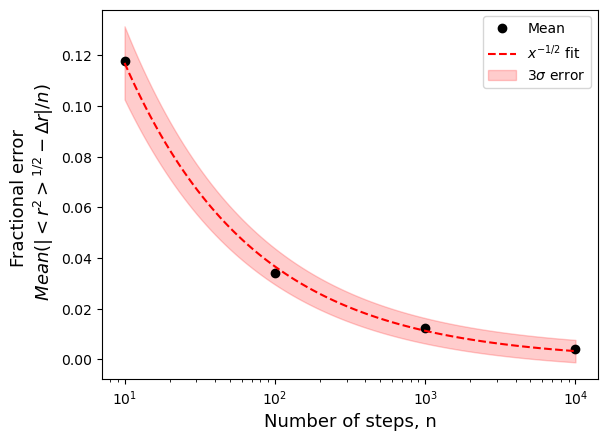

In [155]:
# Plot results
plt.plot(ns, np.array(mean_diffs)/np.array(ns), 'ko')
plt.plot(xfit,yfit,'r--')
plt.fill_between(xfit,yfit-yerr*3,yfit+yerr*3,color='r',alpha=.2)

# Format plot
plt.xscale('log')
plt.xlabel('Number of steps, n',fontsize=13)
plt.ylabel('Fractional error \n $Mean(|<r^2>^{1/2}-\Delta r|/n)$',fontsize=13)

plt.legend(['Mean',r'$x^{-1/2}$ fit','$3\sigma$ error'])

## Optional further exercises
1. Write a function to return the Kuhn length of a polymer chain
2. Write a function to plot the Kuhn segments (hint - modify the existing function)
3. Compare the freely-jointed model with the Kuhn-segment model

Extension:
Compare these two models to the more complicated analytical polymer models such as:
-  Excluded Volume (The chain can't 'overlap' anywhere)
-  Rigidity (Limited bond-angles between adjacent segments)
-  Branching 

Many more details [here](https://people.brandeis.edu/~kuntawu/advanced_physics_laboratory/random_Polymer%20Textbook.pdf)